# Multi-Armed Bandits

### code and data based on: https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/, https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/


### Libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

ModuleNotFoundError: No module named 'rl'

### Importing the dataset


In [2]:

dataset = pd.read_csv('Ads_Optimisation.csv')


### Random strategy

In [3]:

# Implementing Random Selection
N = 10000
d = 10
ads_selected = []
total_reward = 0
def random_strategy(d,data):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = data[ad]#dataset.values[n, ad]
    return reward
for n in range(0, N):
    reward = random_strategy(d,dataset.values[n])
    total_reward = total_reward + reward
print(total_reward)

1287


In [ ]:
## Epsilon-Greedy Strategy

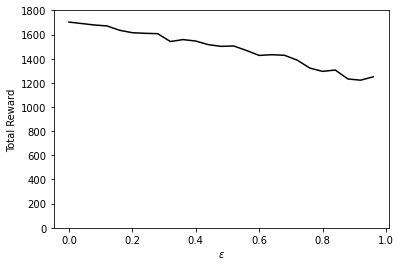

[0.12, 0.11, 0.18, 0.11, 0.12, 0.13, 0.1, 0.08, 0.14, 0.1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


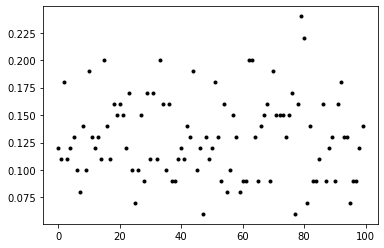

In [37]:
N = 10000
d = 10
epsilon=0.01

def greedy_strategy(d,data):
    ad = 0
    max_upper_bound = 0
    numbers_of_selections = [0] * d
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
        else:
            average_reward = np.inf
        if average_reward > max_upper_bound:
            max_upper_bound = average_reward
            ad = i
    #ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = data[ad]#dataset.values[n, ad]
    return reward

def epsilon_greedy(N,epsilon):
    reward_vs_round = []
    total_reward = 0
    dataset2= dataset.copy().values
    np.random.shuffle(dataset2)
    for n in range(0, N):
        if np.random.uniform()<epsilon:
            reward = random_strategy(d,dataset2[n])
        else:
            reward = greedy_strategy(d,dataset2[n])
        total_reward += reward
        reward_vs_round.append(reward)
    reward_vs_round = np.array(reward_vs_round)
    return reward_vs_round,total_reward

eps = np.arange(0,1,0.04)
plt.plot(eps,[epsilon_greedy(N,epsilon)[1] for epsilon in eps],'k-')
plt.ylim([0,1800])
plt.ylabel('Total Reward')
plt.xlabel('$\epsilon$')
plt.show()


# Upper confidence bound

2125
[0.15, 0.19, 0.06, 0.1, 0.16, 0.07, 0.18, 0.2, 0.11, 0.16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.13, 0.12, 0.15, 0.1, 0.11, 0.08, 0.09, 0.11, 0.14, 0.12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 0, 'Round')

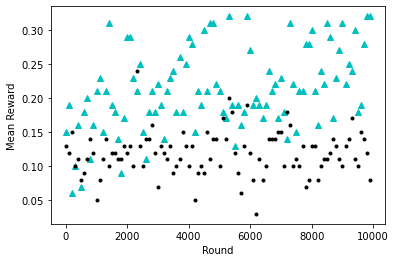

In [42]:
# Implementing UCB

N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0
reward_vs_round = []
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = np.inf
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward
    reward_vs_round.append(reward)
reward_vs_round = np.array(reward_vs_round)
print(total_reward)

means = [np.mean(l) for l in (reward_vs_round[:int(N/100)*100].reshape(int(N/100),100))]
print(means[:10])
print(list(range(len(means)))[:10])
rounds=np.array(list(range(len(means))))*100
plt.plot(rounds,means,'c^')
means = [np.mean(l) for l in (epsilon_greedy(N,1.0)[0][:int(N/100)*100].reshape(int(N/100),100))]
print(means[:10])
print(list(range(len(means)))[:10])

plt.plot(rounds,means,'k.')
plt.ylabel('Mean Reward')
plt.xlabel('Round')

In [ ]:
ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions available in the Cartpole problem
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

In [ ]:
policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
dqn.fit(env, nb_steps=5000, visualize=True, verbose=2)

In [ ]:
dqn.test(env, nb_episodes=5, visualize=True)